In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython import display
from matplotlib.animation import FuncAnimation
from numpy import linalg as LA
import time
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### Erste Programmieraufgabe

In [6]:
plt.style.use('seaborn')
def f(t,y):
    f = np.cos(t)*y
    return f
    
def loeservergleich(h):
    k = int(50/h)
    
    # Anfangswerte:
    euler = np.array([[0,1]],dtype=float)
    collatz = np.array([[0,1]],dtype=float)
    heun = np.array([[0,1]],dtype=float)
    for i in range(k):
        # expliziertes Eulerverfahren
        euler = np.append(euler, [[euler[i,0]+h, euler[i,1]+h*f(euler[i,0], euler[i,1])]], axis=0)
        # Collatzverfahren
        collatz = np.append(collatz, [[collatz[i,0]+h, collatz[i,1]+h*f(collatz[i,0]+(h/2),collatz[i,1]+(h/2)*f(collatz[i,0], collatz[i,1]))]], axis=0)
        # Heunverfahren
        heun = np.append(heun, [[heun[i,0]+h, heun[i,1]+(h/2)*(f(heun[i,0], heun[i,1])+f(heun[i,0]+h,heun[i,1]+h*f(heun[i,0], heun[i,1])))]], axis=0)
    
    
    # Plot der Funktion und Annäherungen
    x = np.linspace(0,50,k)
    plt.plot(x,np.exp(np.sin(x)),  color='yellow', linewidth=7, label="Lösungsfunktion")
    plt.plot(euler[:,0], euler[:,1], color='green', linewidth=2, label="Euler (explizit)")
    plt.plot(collatz[:,0], collatz[:,1], color='red', linewidth=2, label="Collatz")
    plt.plot(heun[:,0], heun[:,1], color='blue', linewidth=2, label="Heun")
    plt.legend(loc="upper right")
    plt.xlim(0,50)
    plt.xlabel("t") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und verschiedene Annäherungen", pad ='15')
    plt.rcParams["figure.figsize"] = (15,15)
    plt.show()

In [7]:
loeservergleich(0.5)

<IPython.core.display.Javascript object>

#### Programmieraufgabe 2 

In [25]:
def ruku_schritt(y,h):
    '''
    Input:, nx4x2 Vektoren, h = Schrittweite
    Output: nx4x2 Vektor für neue y- Wert (2xOrtskoordinate, 2x Geschwiendigkeit)
    '''
    k1 = gravi(y[-1])
    k2 = gravi(y[-1] + 0.5*h*k1)
    k3 = gravi(y[-1] + 0.5*h*k2)
    k4 = gravi(y[-1] + h*k3)
    yneu = y[-1] + h*(k1/6 + k2/3 + k3/3 + k4/6)
    return yneu

def gravi(y):
    '''
    Input: y = 4x2 also vier n=2 Vektoren
    Output:  Vekor der Kraft
    '''
    gravi = np.zeros((4,2))
    gravi[0] = y[2]
    gravi[1] = y[3]
    gravi[2] = F(y)/m1
    gravi[3] = -F(y)/m2
    return gravi 

def F(y): # für f1 sonst -F(y) für f2
    F = ((g*m1*m2)/((LA.norm(y[1]-y[0],2))**3))*(y[1]-y[0])
    return F

##### Test der Berechnung

In [26]:
#Testwerte
y = np.array([[[-1,0],[1,0],[0,1/1], [0,-1/5]]],dtype=float)# Anfangsort und Anfangsgeschwindigkeiten
h = 0.1
g = 1
m1 = 1
m2 = 1 

#5mal runge kutter
for i in range(5):
    y = np.append(y, [ruku_schritt(y, h)],  axis=0)
print(y[:])

[[[-1.          0.        ]
  [ 1.          0.        ]
  [ 0.          1.        ]
  [ 0.         -0.2       ]]

 [[-0.9987506   0.09997501]
  [ 0.9987506  -0.01997501]
  [ 0.02497586  0.99925077]
  [-0.02497586 -0.19925077]]

 [[-0.99500964  0.19980048]
  [ 0.99500964 -0.03980048]
  [ 0.04980751  0.99701234]
  [-0.04980751 -0.19701234]]

 [[-0.98879862  0.29932872]
  [ 0.98879862 -0.05932872]
  [ 0.07435386  0.99331213]
  [-0.07435386 -0.19331213]]

 [[-0.98015289  0.39841565]
  [ 0.98015289 -0.07841565]
  [ 0.09847987  0.98819482]
  [-0.09847987 -0.18819482]]

 [[-0.96912088  0.49692244]
  [ 0.96912088 -0.09692244]
  [ 0.12205931  0.98172088]
  [-0.12205931 -0.18172088]]]


In [37]:
def doppelstern(M1,M2,x1,x2,p,h):
    # Initialisierung der Werte
    global m1
    global m2
    global g
    g = 1 # Vorgabe aus VL
    m1 = M1
    m2 = M2
    
    global y
    y = np.array([[[x1,0],[x2,0],[0,p/m1],[0,-p/m2]]],dtype=float) # Anfangsort und Anfangsgeschwindigkeiten


    
    #AB HIER BIN ICH MIR UNSICHER... 
    
    '''    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    axis = plt.axes(xlim =(-5, 5),ylim =(-10, 10))
    line, = axis.plot([], [], lw = 2)
    
    
    
    def animate1(i):
        y = np.append(y, [ruku_schritt(y, h)],  axis=0) #Berechnung der Bewegung (richtig so.)
        line.set_data(y[:,0,0], y[:,0,1]) # Werte für erste Kurve
        line.set_data(y[:,1,0], y[:,1,1]) # Werte für zweite Kurve
        return line,

    
    
    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate1,frames = 500,interval = 20,blit = True)
    '''
    #PLOT MIT FOR-SCHLEIFE
    
    f1 = plt.figure(figsize=(10,10))
    
    while True:
        try:
            #print(y[-1,0,0], y[-1,0,1])
            plt.plot(y[-1,0,0], y[-1,0,1], 'r.')
            plt.plot(y[-1,1,0], y[-1,1,1], 'b.')
            y = np.append(y, [ruku_schritt(y, h)],  axis=0)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            display.display(plt.gcf())       # Darstellung in Jupyter
            display.clear_output(wait=True)  # Darstellung in Jupyter
            # time.sleep(.01)                  # Darstellung in Jupyter
            #plt.pause(0.1) 
            #plt.clf()
        except KeyboardInterrupt:
            break
        
        
    
    plt.show()
        

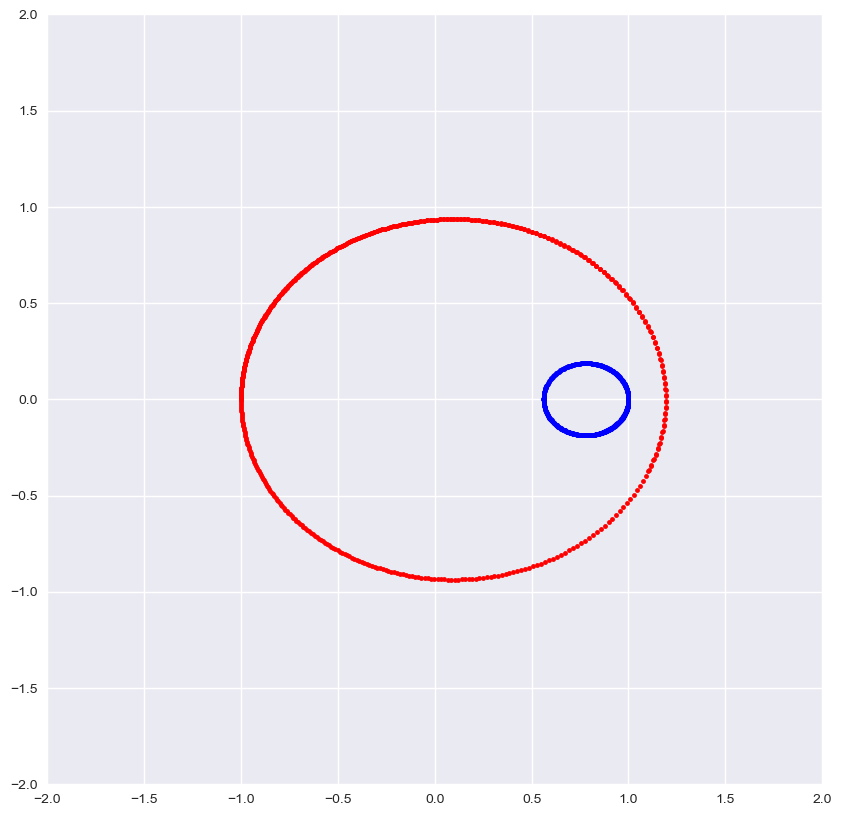

In [38]:
m1 = 1
m2 = 5
x1 = -1
x2= 1
p= 1
h = 0.01

doppelstern(m1,m2,x1,x2,p,h)